In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df_original = pd.read_csv("data/RoadTrafficAccidentLocations.csv", sep=",", low_memory=False)
df_original = df_original.drop(df_original.columns[0], axis=1)
df_original

,AccidentType,AccidentType_de,AccidentType_fr,AccidentType_it,AccidentType_en,AccidentSeverityCategory,AccidentSeverityCategory_de,AccidentSeverityCategory_fr,AccidentSeverityCategory_it,AccidentSeverityCategory_en,...,AccidentMonth_fr,AccidentMonth_it,AccidentMonth_en,AccidentWeekDay,AccidentWeekDay_de,AccidentWeekDay_fr,AccidentWeekDay_it,AccidentWeekDay_en,AccidentHour,AccidentHour_text
0,at2,Auffahrunfall,accident par tamponnement,Incidente di tamponamento,Accident with rear-end collision,as3,Unfall mit Leichtverletzten,accident avec blessés légers,Incidente con feriti leggeri,Accident with light injuries,...,janvier,Gennaio,January,aw403,Mittwoch,mercredi,Mercoledì,Wednesday,16.0,16h-17h
1,at0,Schleuder- oder Selbstunfall,dérapage ou perte de maîtrise,Incidente di sbandamento o per colpa propria,Accident with skidding or self-accident,as3,Unfall mit Leichtverletzten,accident avec blessés légers,Incidente con feriti leggeri,Accident with light injuries,...,janvier,Gennaio,January,aw404,Donnerstag,jeudi,Giovedì,Thursday,0.0,00h-01h
2,at1,Überholunfall oder Fahrstreifenwechsel,accident lors d'un dépassement ou lors d'un ch...,Incidente di sorpasso o al cambiamento di corsia,Accident when overtaking or changing lanes,as3,Unfall mit Leichtverletzten,accident avec blessés légers,Incidente con feriti leggeri,Accident with light injuries,...,janvier,Gennaio,January,aw402,Dienstag,mardi,Martedì,Tuesday,11.0,11h-12h
3,at8,Fussgängerunfall,accident impliquant des piétons,Incidente con pedoni,Accident involving pedestrian(s),as3,Unfall mit Leichtverletzten,accident avec blessés légers,Incidente con feriti leggeri,Accident with light injuries,...,janvier,Gennaio,January,aw401,Montag,lundi,Lunedí,Monday,11.0,11h-12h
4,at4,Einbiegeunfall,accident en s'engageant sur une route,Incidente nell’immettersi in una strada,Accident when turning-into main road,as2,Unfall mit Schwerverletzten,accident avec blessés graves,Incidente con feriti gravi,Accident with severe injuries,...,janvier,Gennaio,January,aw401,Montag,lundi,Lunedí,Monday,8.0,08h-09h
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232298,at3,Abbiegeunfall,accident en quittant une route,Incidente nello svoltare,Accident when turning left or right,as3,Unfall mit Leichtverletzten,accident avec blessés légers,Incidente con feriti leggeri,Accident with light injuries,...,mai,Maggio,May,aw407,Sonntag,dimanche,Domenica,Sunday,12.0,12h-13h
232299,at0,Schleuder- oder Selbstunfall,dérapage ou perte de maîtrise,Incidente di sbandamento o per colpa propria,Accident with skidding or self-accident,as3,Unfall mit Leichtverletzten,accident avec blessés légers,Incidente con feriti leggeri,Accident with light injuries,...,mai,Maggio,May,aw404,Donnerstag,jeudi,Giovedì,Thursday,10.0,10h-11h
232300,at0,Schleuder- oder Selbstunfall,dérapage ou perte de maîtrise,Incidente di sbandamento o per colpa propria,Accident with skidding or self-accident,as3,Unfall mit Leichtverletzten,accident avec blessés légers,Incidente con feriti leggeri,Accident with light injuries,...,juin,Giugno,June,aw405,Freitag,vendredi,Venerdì,Friday,20.0,20h-21h
232301,at0,Schleuder- oder Selbstunfall,dérapage ou perte de maîtrise,Incidente di sbandamento o per colpa propria,Accident with skidding or self-accident,as3,Unfall mit Leichtverletzten,accident avec blessés légers,Incidente con feriti leggeri,Accident with light injuries,...,avril,Aprile,April,aw405,Freitag,vendredi,Venerdì,Friday,19.0,19h-20h


In [13]:
#alle Spaltenausführungen auf en, it, fr löschen
df = df_original.drop(columns=df_original.filter(regex='(_en|_fr|_it)$').columns)
df.to_csv("data/filteredDataFrame.csv", index=False)

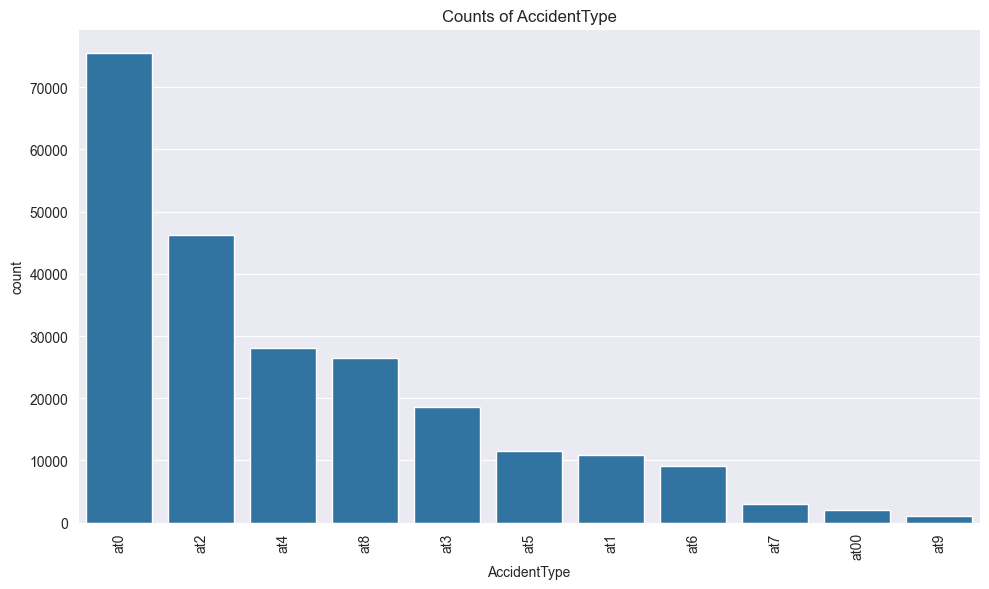

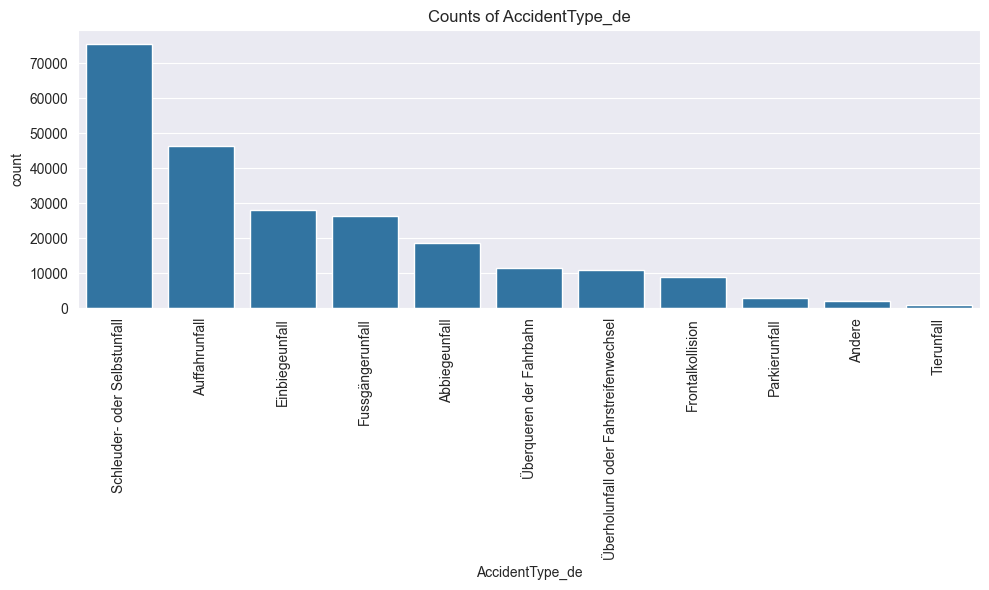

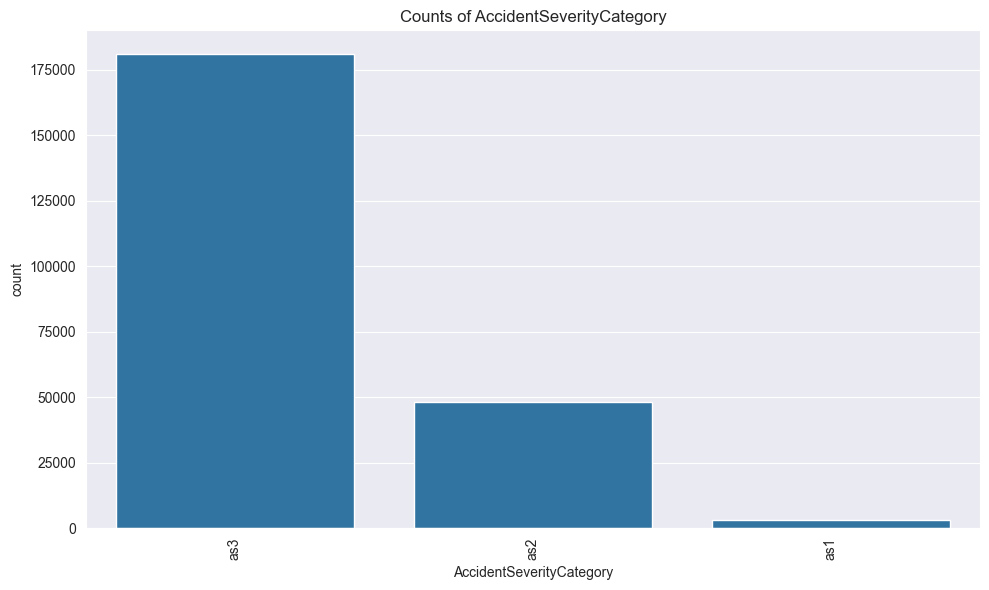

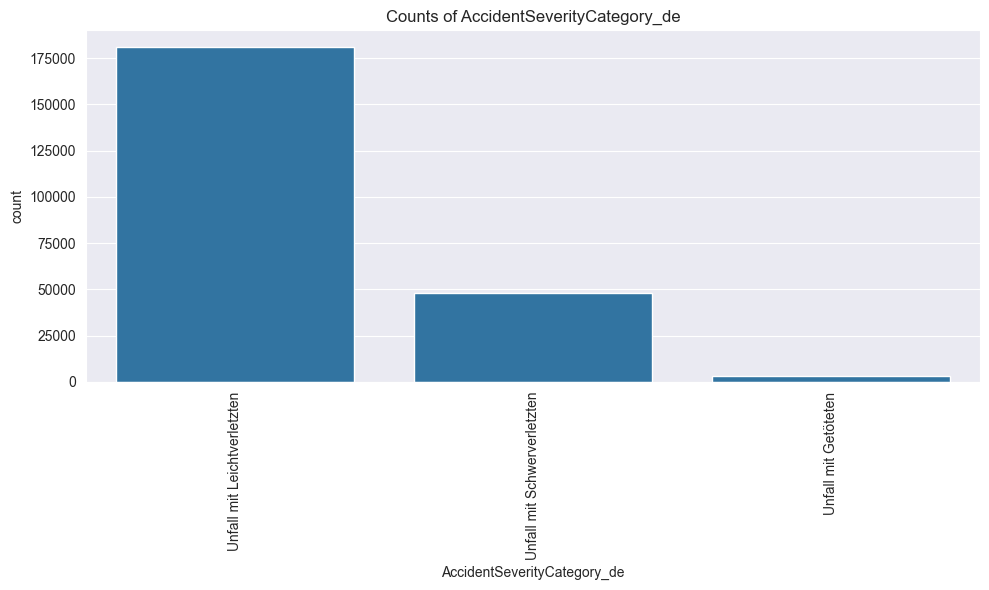

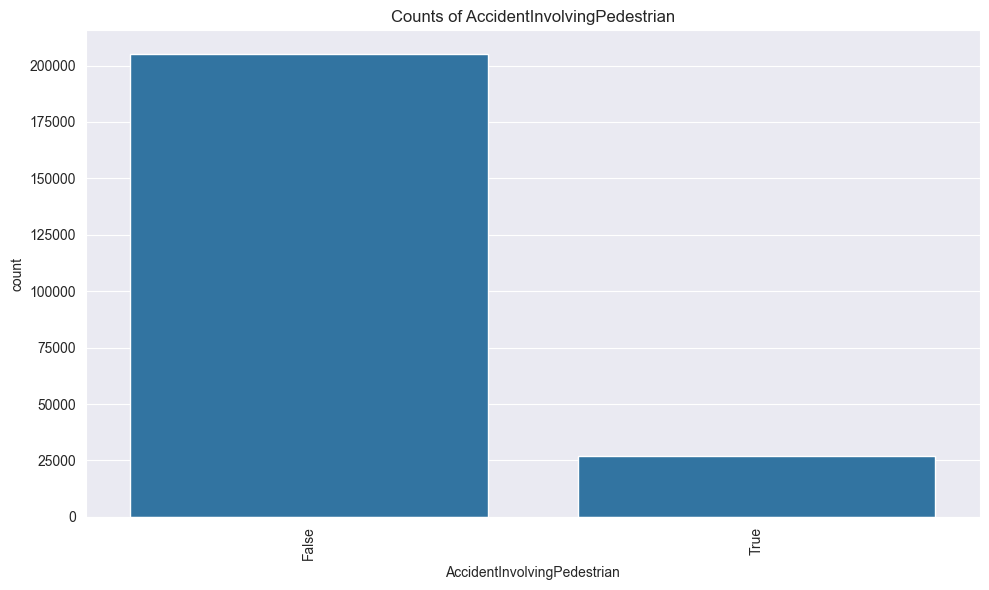

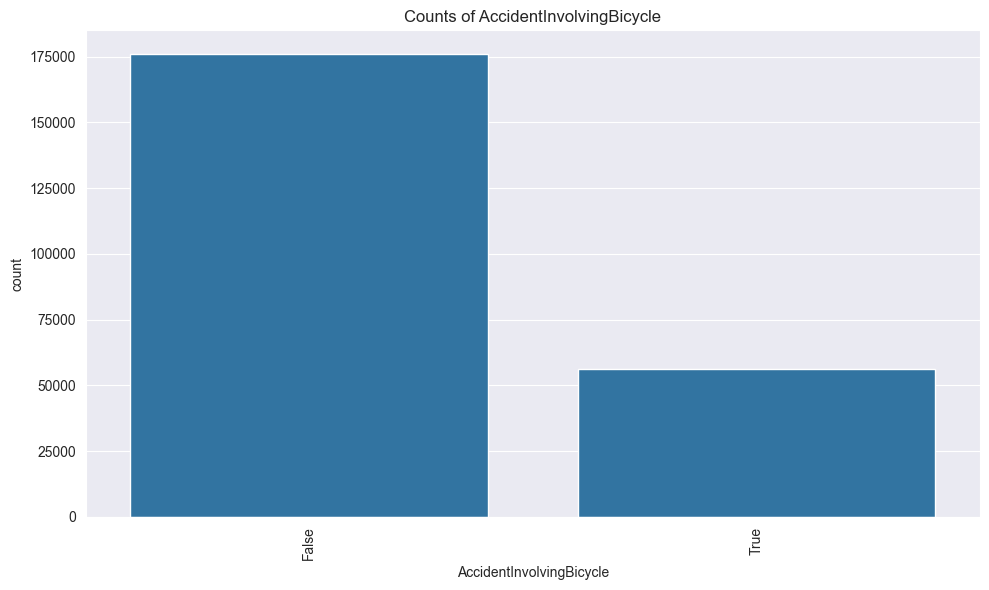

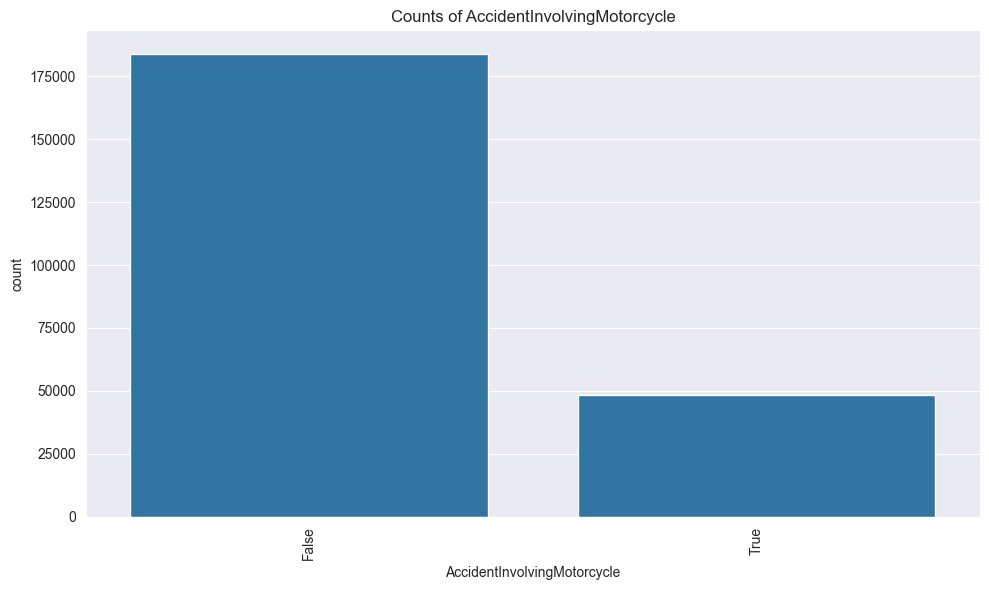

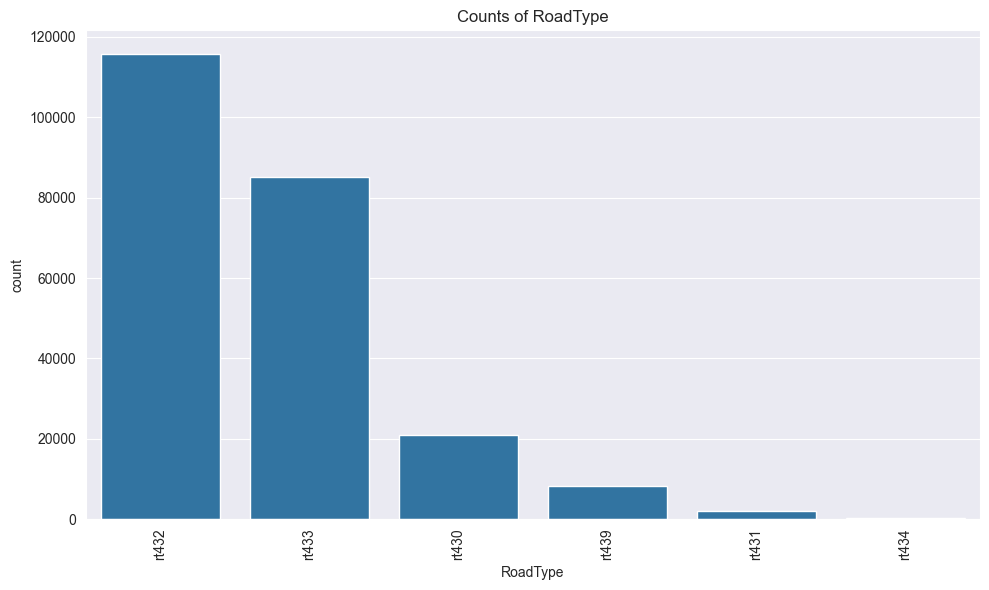

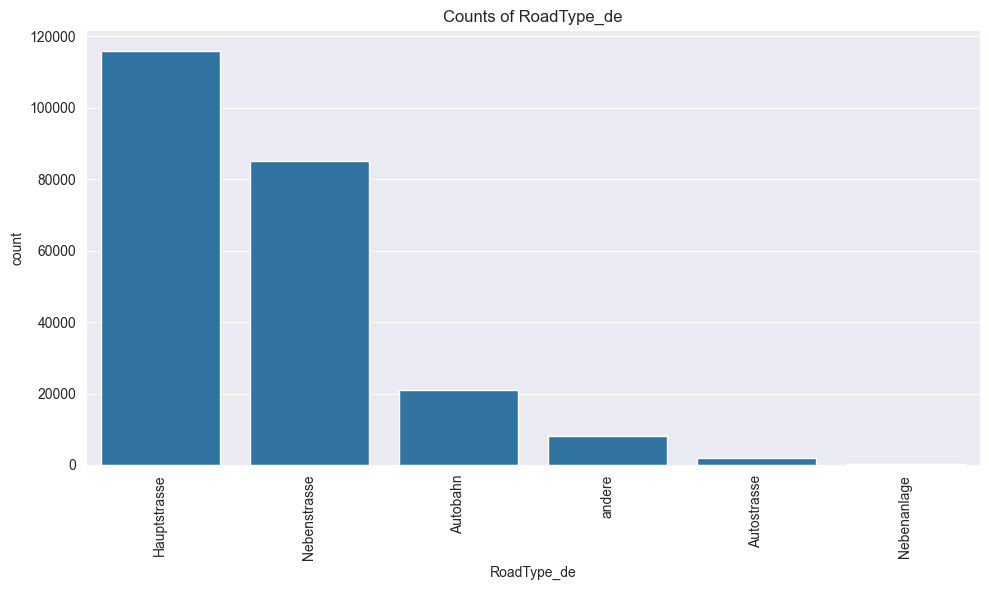

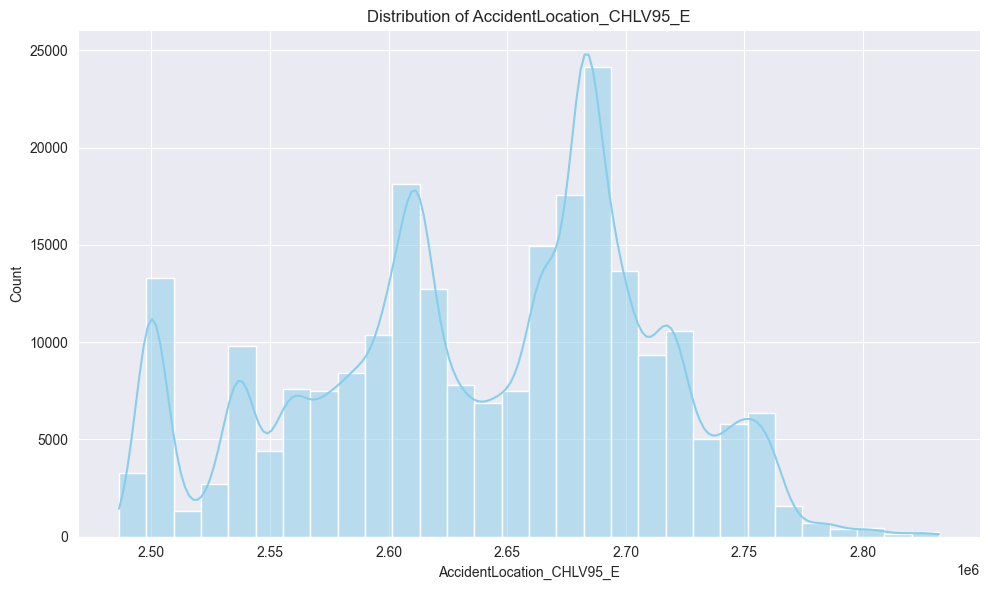

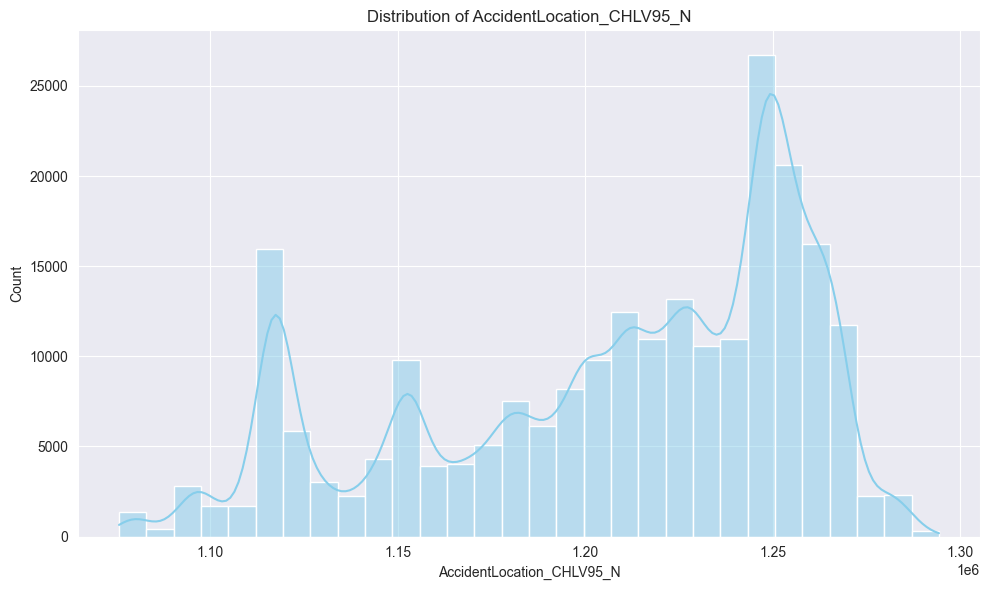

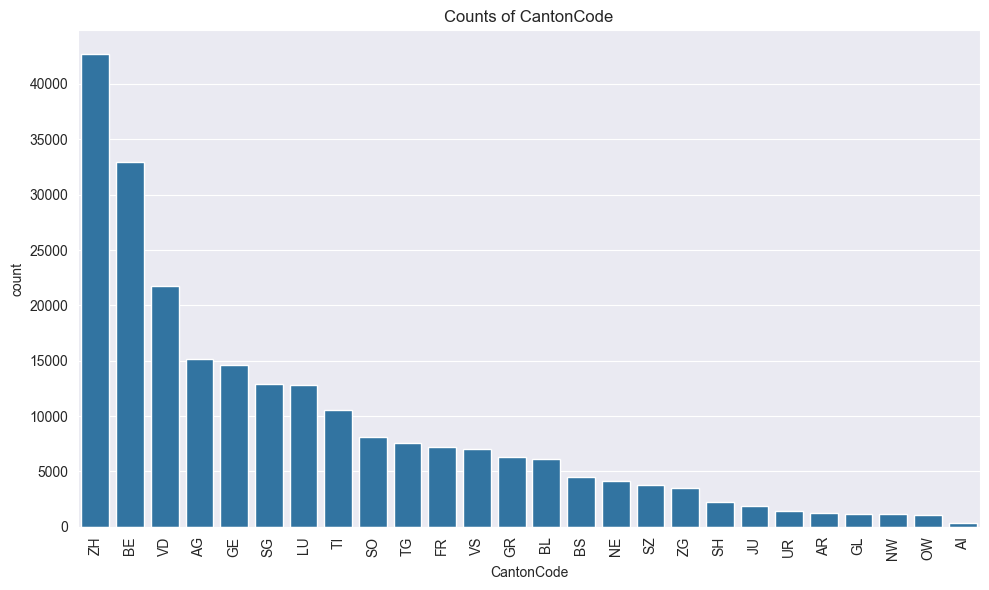

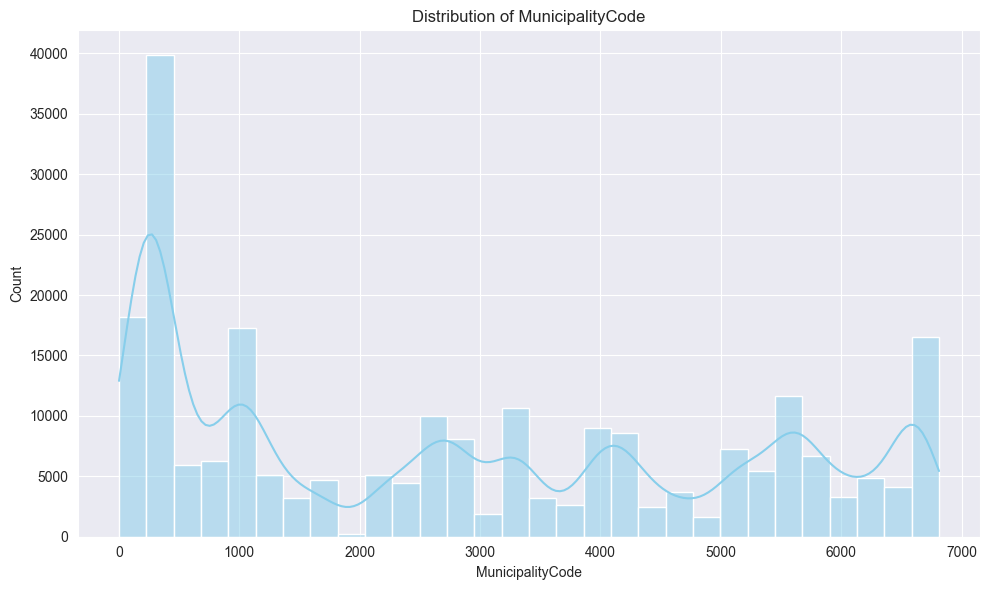

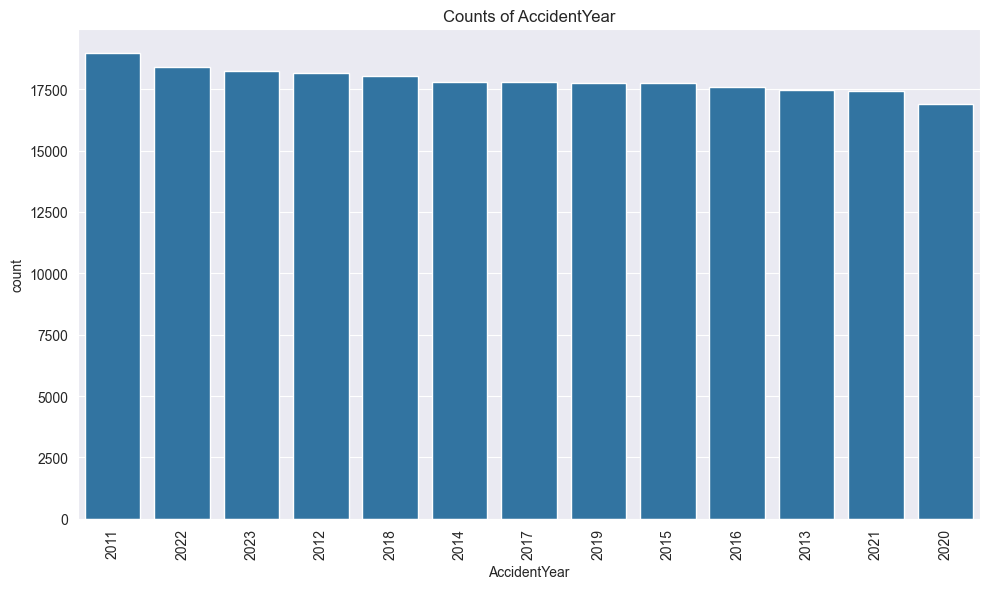

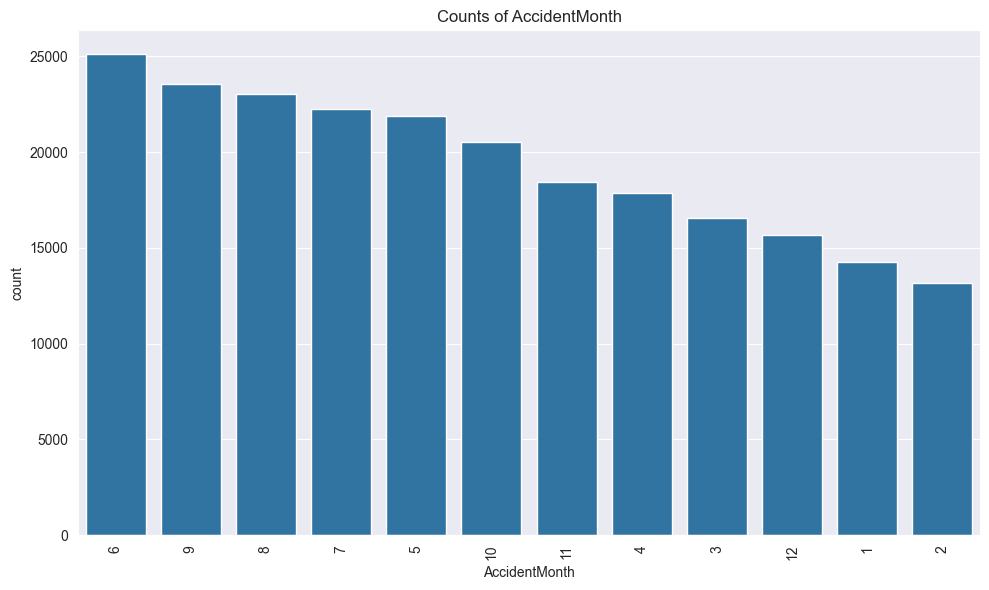

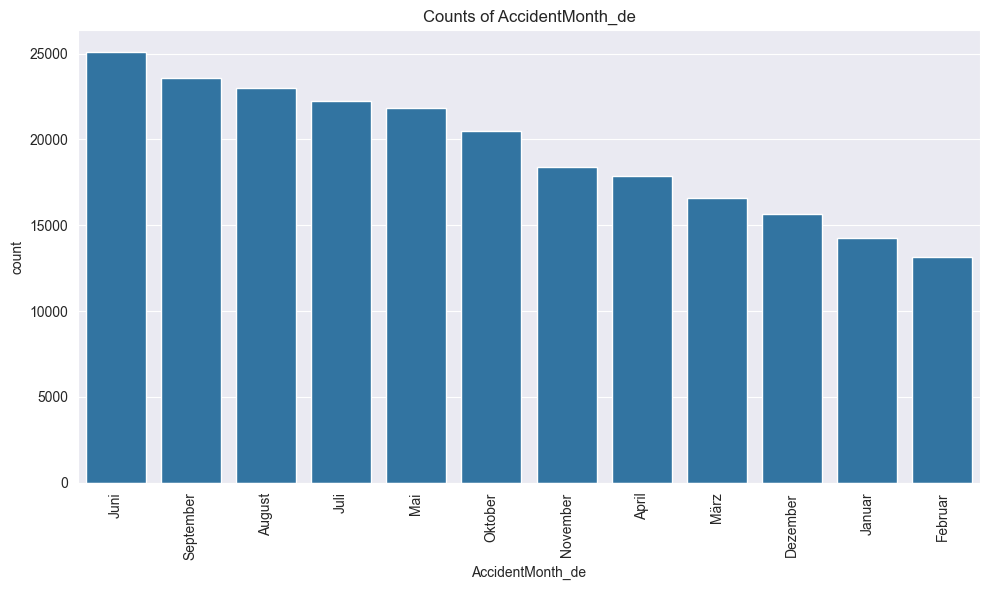

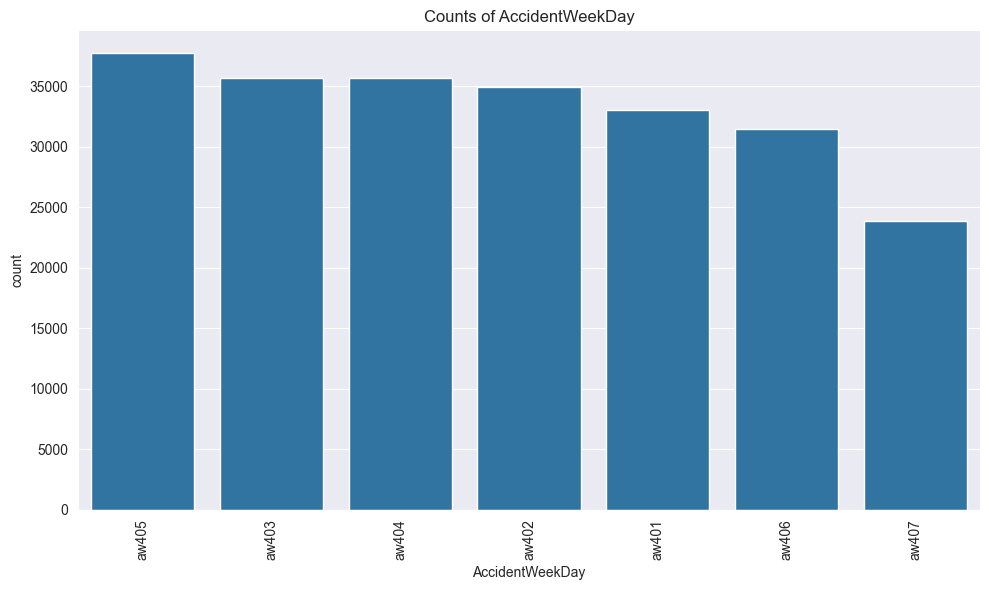

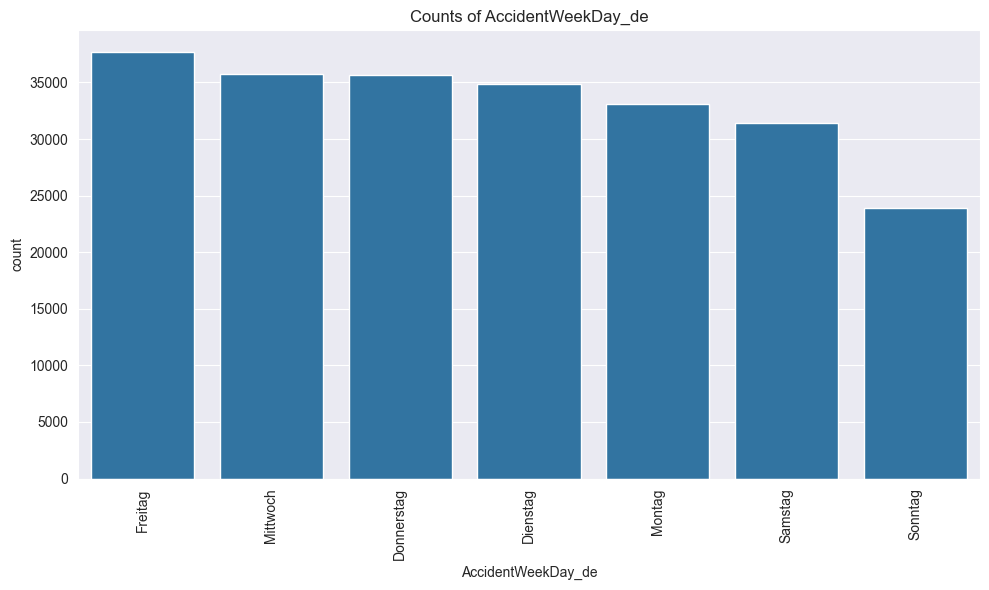

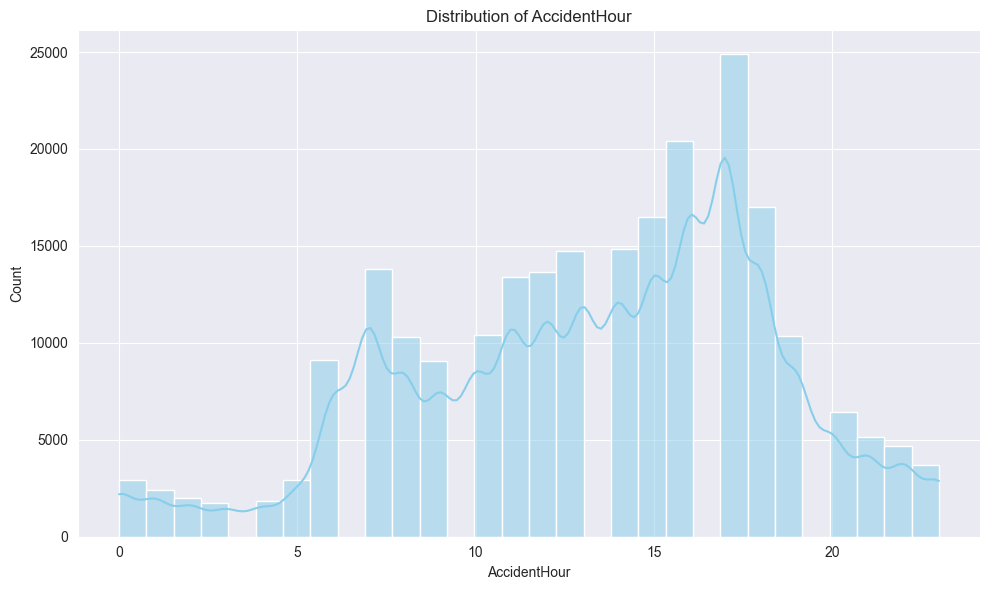

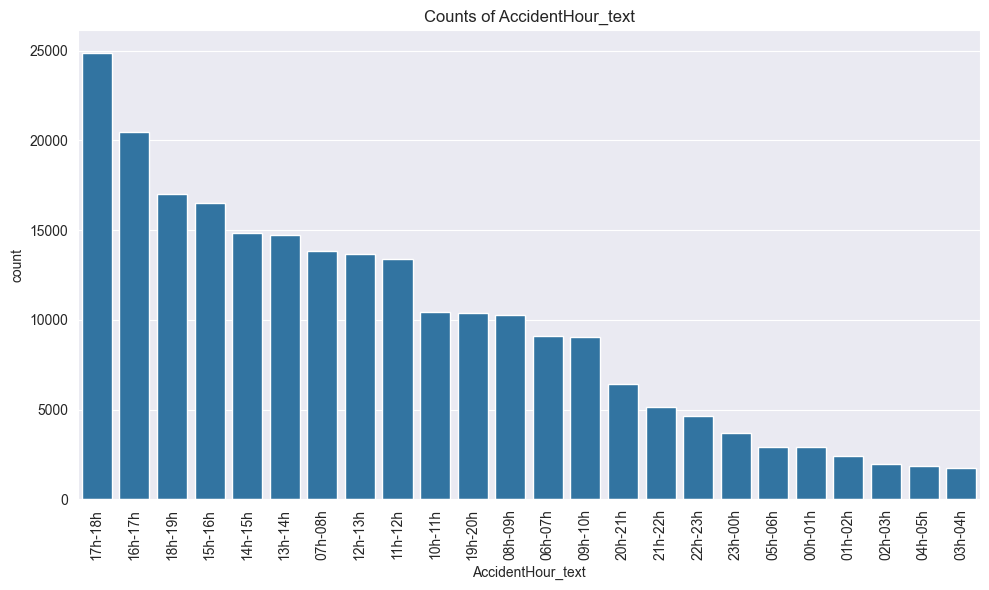

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot counts or distributions for each column
def plot_column_counts(df):
    for column in df.columns:
        plt.figure(figsize=(10, 6))
        
        # Check if the column is categorical or numerical
        if df[column].dtype == 'object' or df[column].dtype.name == 'category' or df[column].dtype == 'bool':
            # Categorical data: use countplot without the palette warning
            sns.countplot(data=df, x=column, order=df[column].value_counts().index)
            plt.title(f'Counts of {column}')
            plt.xticks(rotation=90)
        else:
            # Numerical data: use histogram
            sns.histplot(df[column], kde=True, bins=30, color='skyblue')
            plt.title(f'Distribution of {column}')
        
        plt.tight_layout()
        plt.show()

# Call the function to plot for all columns
plot_column_counts(df)


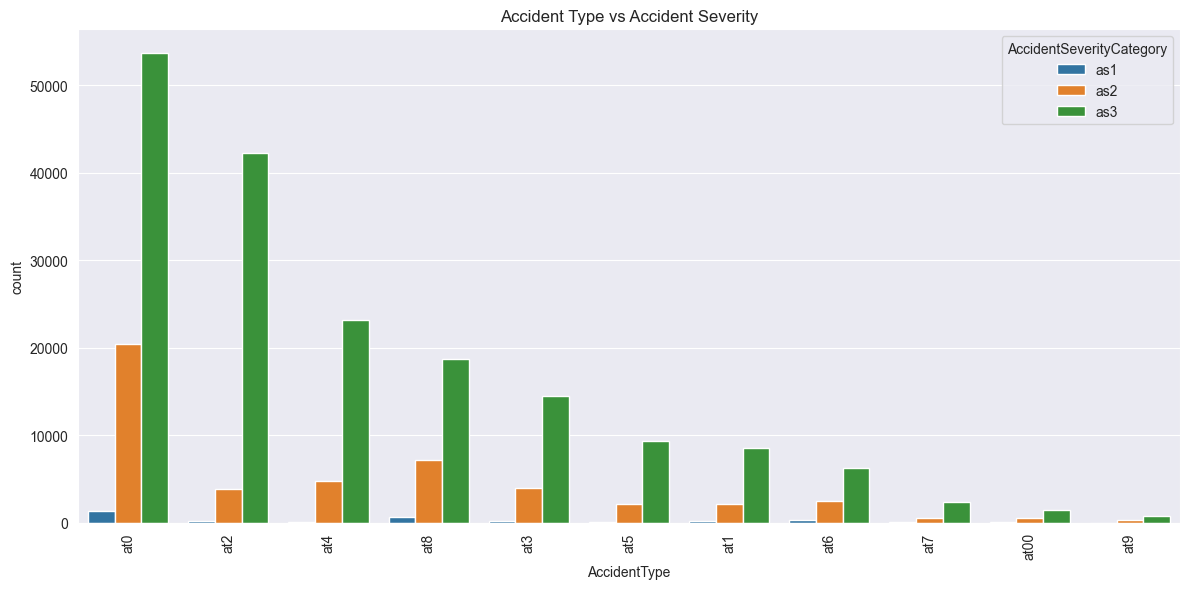

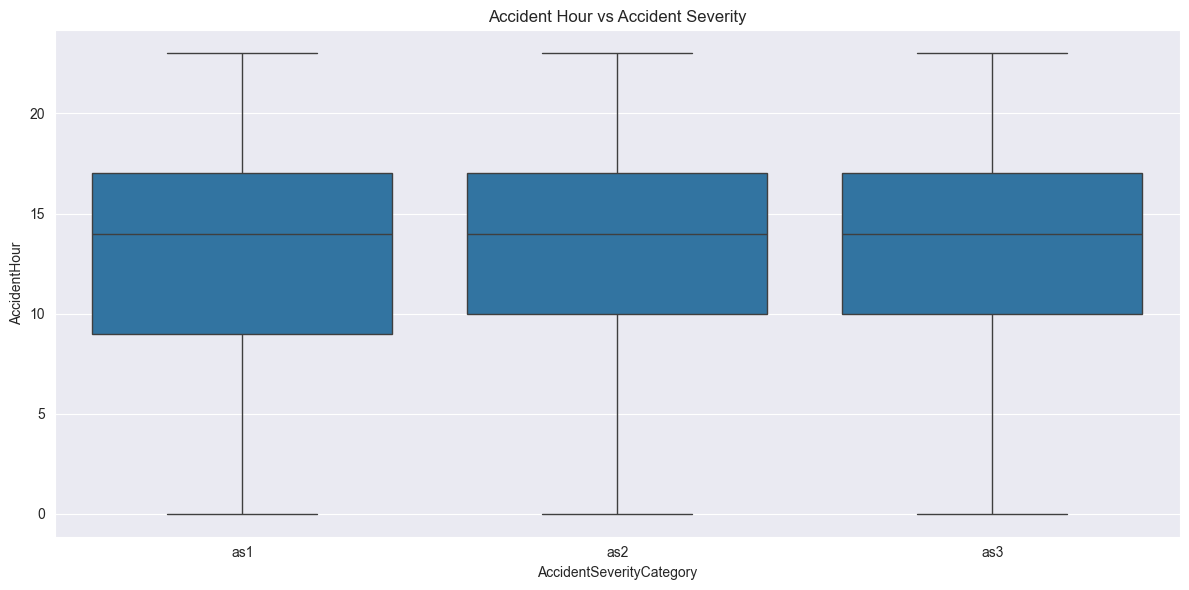

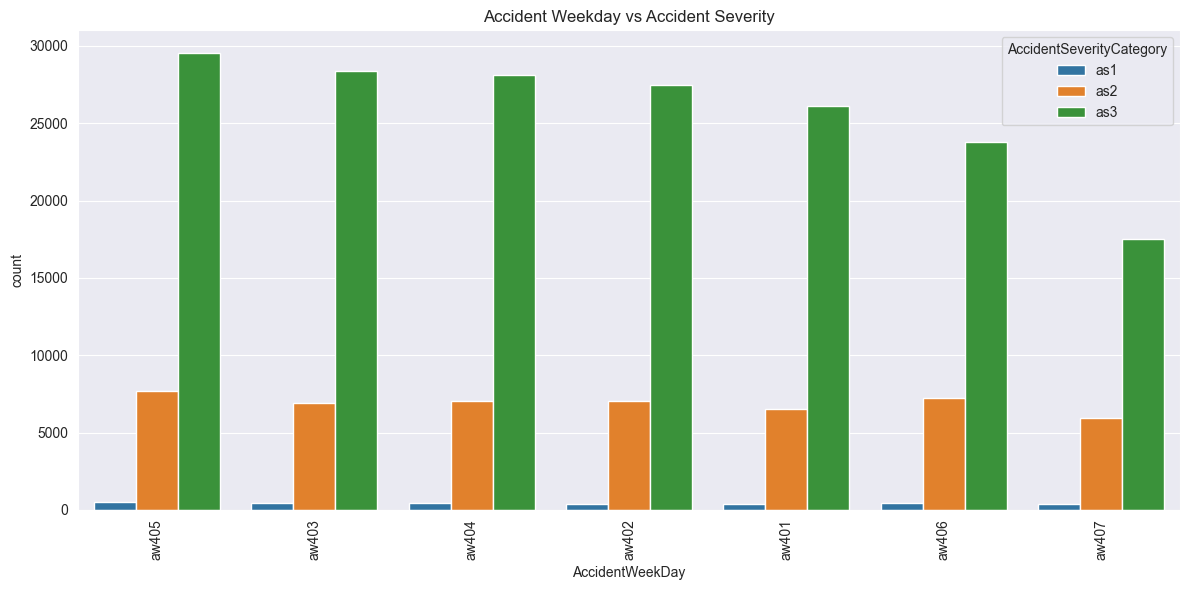

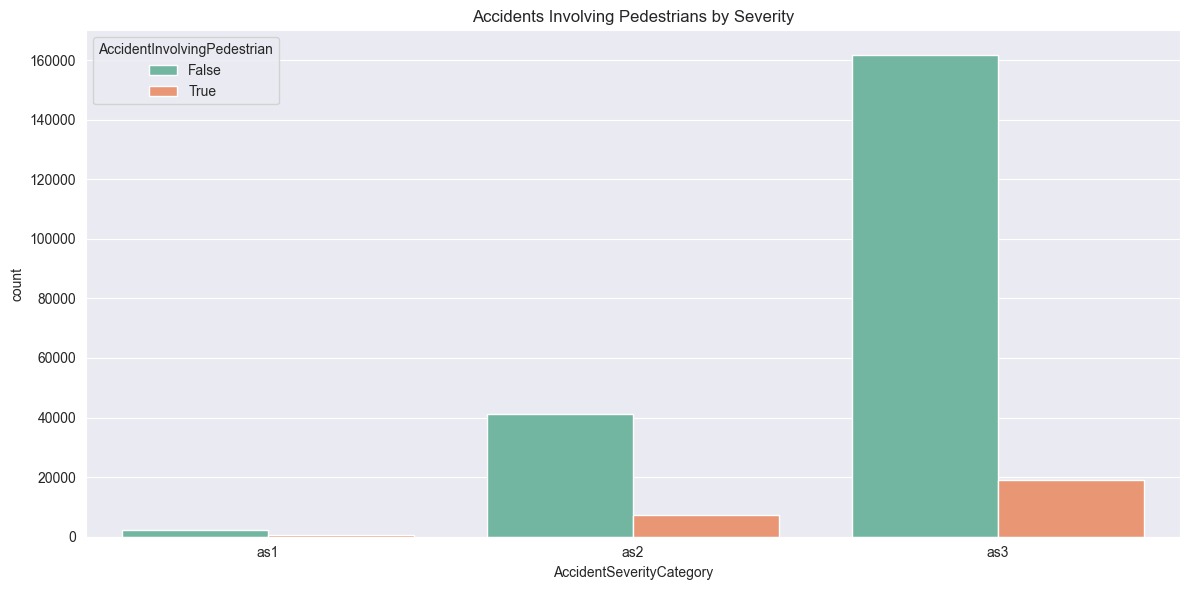

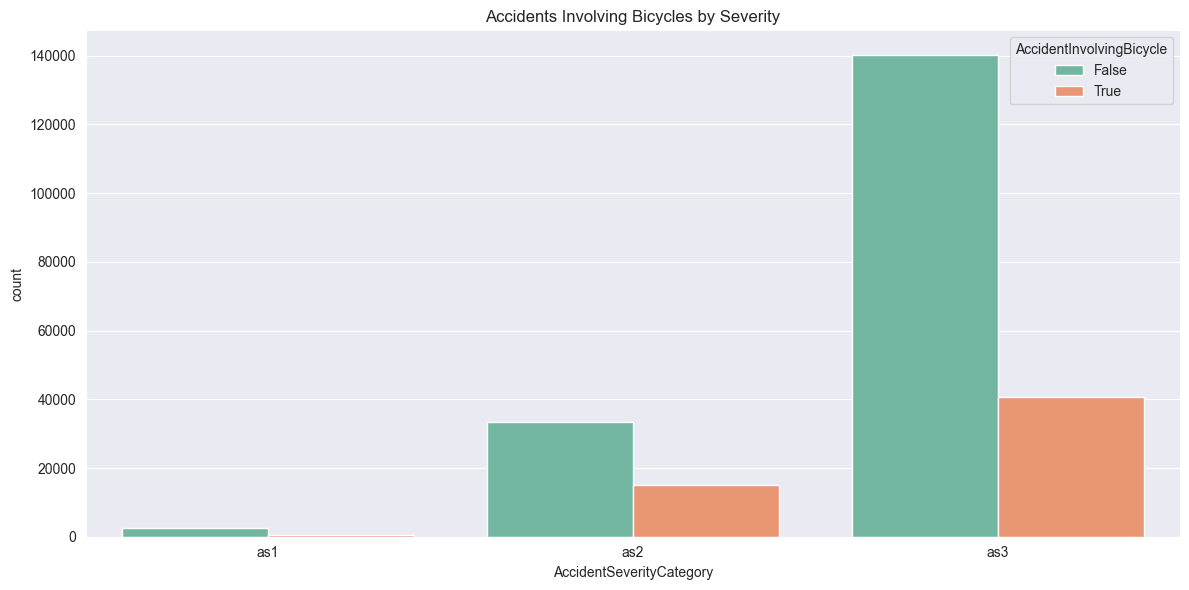

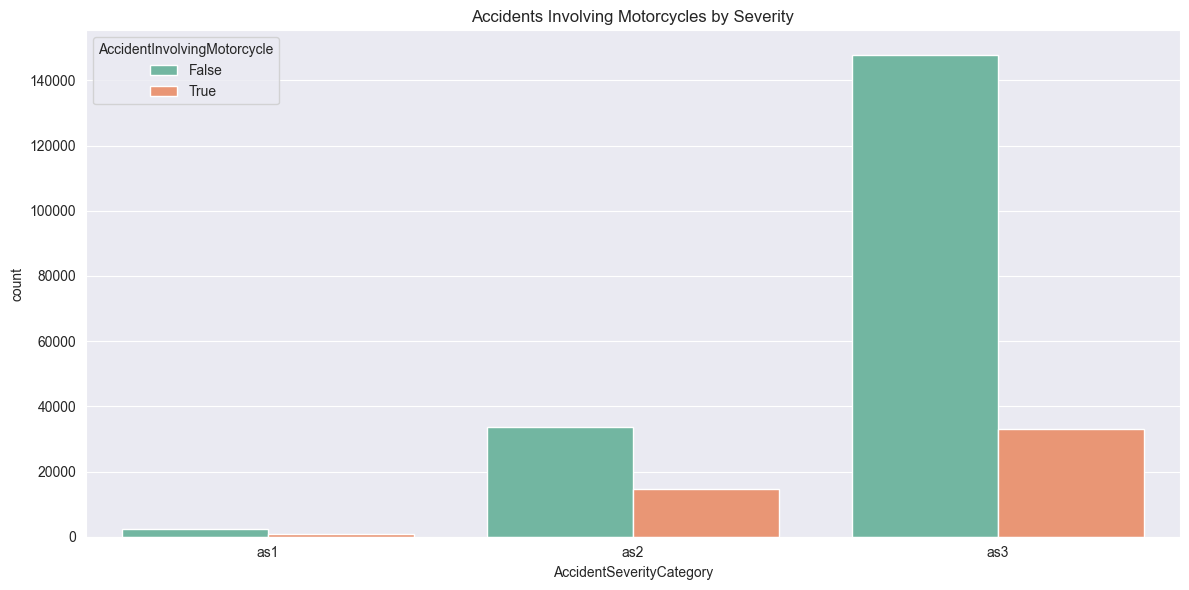

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert target and relevant features to categorical for better visualization
df['AccidentSeverityCategory'] = df['AccidentSeverityCategory'].astype('category')
df['AccidentType'] = df['AccidentType'].astype('category')
df['AccidentWeekDay'] = df['AccidentWeekDay'].astype('category')
df['AccidentHour'] = df['AccidentHour'].fillna(df['AccidentHour'].median())  # Handling missing values in AccidentHour

# 1. Verteilung der Unfalltypen (AccidentType) in Bezug auf die Unfallschwere
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='AccidentType', hue='AccidentSeverityCategory', order=df['AccidentType'].value_counts().index)
plt.title('Accident Type vs Accident Severity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 2. Einfluss der Unfallstunde (AccidentHour) auf die Unfallschwere
plt.figure(figsize=(12, 6))
sns.boxplot(x='AccidentSeverityCategory', y='AccidentHour', data=df)
plt.title('Accident Hour vs Accident Severity')
plt.tight_layout()
plt.show()

# 3. Unfalltypen nach Wochentagen und deren Schwere
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='AccidentWeekDay', hue='AccidentSeverityCategory', order=df['AccidentWeekDay'].value_counts().index)
plt.title('Accident Weekday vs Accident Severity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 4. Unfälle mit Beteiligung von Fußgängern, Fahrrädern, Motorrädern vs. Unfallschwere
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='AccidentSeverityCategory', hue='AccidentInvolvingPedestrian', palette='Set2')
plt.title('Accidents Involving Pedestrians by Severity')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='AccidentSeverityCategory', hue='AccidentInvolvingBicycle', palette='Set2')
plt.title('Accidents Involving Bicycles by Severity')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='AccidentSeverityCategory', hue='AccidentInvolvingMotorcycle', palette='Set2')
plt.title('Accidents Involving Motorcycles by Severity')
plt.tight_layout()
plt.show()


Accuracy: 0.7709
Classification Report:
               precision    recall  f1-score   support

         as1       0.25      0.00      0.00       932
         as2       0.42      0.10      0.16     14572
         as3       0.79      0.97      0.87     54187

    accuracy                           0.77     69691
   macro avg       0.49      0.36      0.34     69691
weighted avg       0.70      0.77      0.71     69691



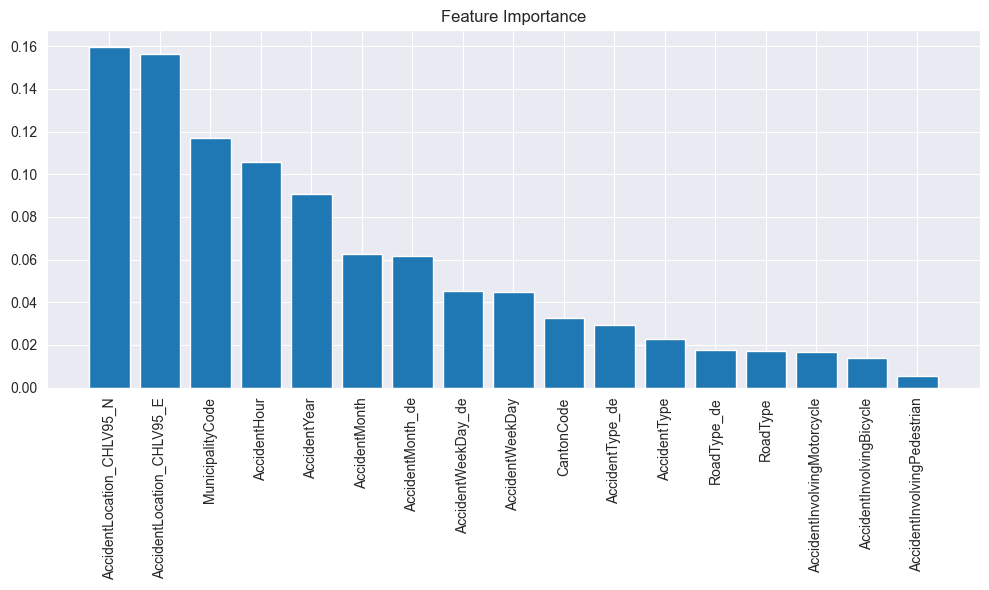

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Vorbereitung des Datensatzes
df['AccidentSeverityCategory'] = df['AccidentSeverityCategory'].astype('category')

# Feature-Auswahl: Schließe die Zielvariable und unnötige Spalten aus
X = df.drop(columns=['AccidentSeverityCategory', 'AccidentSeverityCategory_de', 'AccidentHour_text'])
y = df['AccidentSeverityCategory']

# Kategorische Features in numerische Werte umwandeln (Label Encoding)
categorical_columns = X.select_dtypes(include=['object', 'category', 'bool']).columns
for col in categorical_columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Fehlende Werte (falls vorhanden) füllen
X.fillna(X.median(), inplace=True)

# Aufteilen in Trainings- und Testdaten (70% Training, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialisiere und trainiere das Random Forest Modell
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Vorhersagen auf Testdaten
y_pred = rf_model.predict(X_test)

# Evaluierung des Modells
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature Importance: Welche Features haben den größten Einfluss auf die Vorhersagen?
import matplotlib.pyplot as plt
import numpy as np

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


Mögliche Forschungsfrage: "Wie genau kann die Schwere von Verkehrsunfällen anhand von historischen Daten vorhergesagt werden, und welche Merkmale tragen am meisten zur Vorhersage bei?"